In [4]:
import sys
!{sys.executable} -m pip install beautifulsoup4 requests lxml seaborn
from bs4 import BeautifulSoup
from collections import Counter
from IPython.display import Image
from IPython.core.display import HTML 
import requests
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:

all_posts = []
source_string_base = "https://www.skinnytaste.com/page/"

for x in range(1, 30):
    
    source = requests.get(source_string_base + str(x)).text
    soup = BeautifulSoup(source, 'html.parser')
    
    for Post in soup.find_all('article', class_='teaser-post'):
        
        if Post.find('span', class_='icon-star'):
            
            entry = dict()
            entry['title'] = Post.h2.text
            entry['image'] = Post.img['src']
            entry['calories'] = Post.find('span', class_='icon-star').text
            
            if Post.find('span', class_='green'):
                entry['green_points'] = Post.find('span', class_='green').text
            else:
                entry['green_points'] = 0
            
            if Post.find('span', class_='purple'):
                entry['purple_points'] = Post.find('span', class_='purple').text
            else:
                entry['purple_points'] = 0
                
            if Post.find('span', class_='blue'):
                entry['blue_points'] = Post.find('span', class_='blue').text
            else:
                entry['blue_points'] = 0

            entry['summary'] = Post.find('p', class_='excerpt').text
            entry['keys'] = []
            
            for KeyImage in Post.find_all('img', class_='attachment-thumbnail'):
                if KeyImage['alt'] not in entry['keys']:
                    entry['keys'].append(KeyImage['alt'])
                
            all_posts.append(entry)


columns = ['title', 'image', 'calories', 'green_points', 'purple_points', 'blue_points', 'summary', 'keys']
dataFrame = pd.DataFrame(all_posts, columns=columns)
dataFrame


,title,image,calories,green_points,purple_points,blue_points,summary,keys
0,Chicken Parmesan Rolls,https://www.skinnytaste.com/wp-content/uploads...,259,8,5,5,These protein packed Chicken Parmesan Rolls (a...,"[Kid Friendly, Meal Prep Recipes, Under 30 Min..."
1,Herb and Salt-Rubbed Dry Brine Turkey,https://www.skinnytaste.com/wp-content/uploads...,225,2,0,0,This Herb and Salt-Rubbed Dry Brined Turkey co...,"[Gluten Free, Keto Recipes, Kid Friendly, Low ..."
2,Turkey Pot Pie with Stuffing Crust,https://www.skinnytaste.com/wp-content/uploads...,390,8,4,4,Turkey Pot Pie with Stuffing Crust is a fun tw...,[]
3,Lightened Up Green Bean Casserole,https://www.skinnytaste.com/wp-content/uploads...,160,3,3,3,"This holiday season enjoy a lighter, healthier...","[Kid Friendly, Vegetarian Meals]"
4,Smashed Sweet Potatoes,https://www.skinnytaste.com/wp-content/uploads...,206,6,2,6,"Smashed Sweet Potatoes, seasoned with thyme ar...","[Gluten Free, Kid Friendly, Vegetarian Meals]"
...,...,...,...,...,...,...,...,...
246,Heather’s Buddha Bowl,https://www.skinnytaste.com/wp-content/uploads...,372,10,4,7,This easy Buddha Bowl is made with roasted bro...,"[Dairy Free, Gluten Free, Vegetarian Meals]"
247,How To Make Perfect Hard Boiled Eggs,https://www.skinnytaste.com/wp-content/uploads...,77,2,0,0,Having hard boiled eggs on hand for quick brea...,"[Dairy Free, Gluten Free, Keto Recipes, Kid Fr..."
248,Swiss Chard Eggs Benedict,https://www.skinnytaste.com/wp-content/uploads...,244,3,3,4,I love this lighter take on Eggs Benedict made...,"[Dairy Free, Gluten Free, Under 30 Minutes]"
249,"Shrimp, Peas and Rice",https://www.skinnytaste.com/wp-content/uploads...,346,8,3,8,"This Shrimp, Peas and Rice dish is a family fa...","[Gluten Free, Kid Friendly, Under 30 Minutes]"


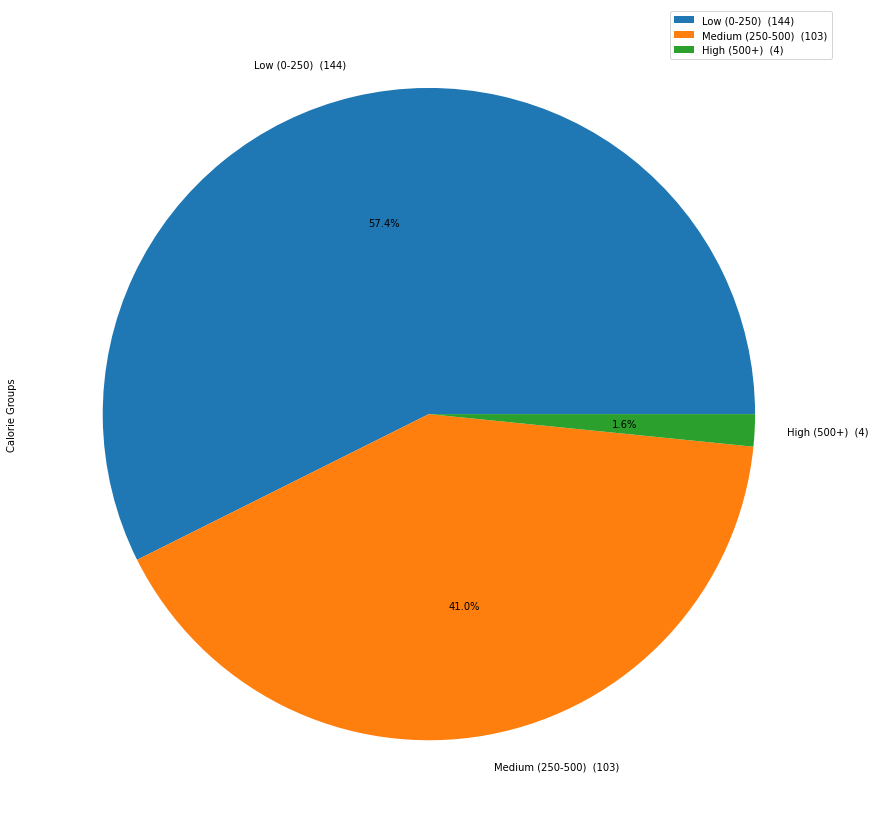

In [9]:
# Visualize calorie data
dataFrame.astype({'calories': 'float'}).describe()
low = 0
medium = 0
high = 0

dataFrame['calories'] = dataFrame['calories'].astype(float)

for index, item in dataFrame.iterrows():
    cal = item['calories']
    if cal > 0 and cal < 250:
        low = low + 1
    if cal > 250 and cal < 500:
        medium = medium + 1
    if cal > 500:
        high = high + 1
        
low_label = 'Low (0-250) ' + ' (' + str(low) + ')'
medium_label = 'Medium (250-500) ' + ' (' + str(medium) + ')'
high_label = 'High (500+) ' + ' (' + str(high) + ')'


pointFrame = pd.DataFrame({'Calorie Groups': [low, medium, high]}, 
                          index=[low_label, medium_label, high_label])
plot = pointFrame.plot.pie(y='Calorie Groups', figsize=(15, 15), autopct='%1.1f%%')

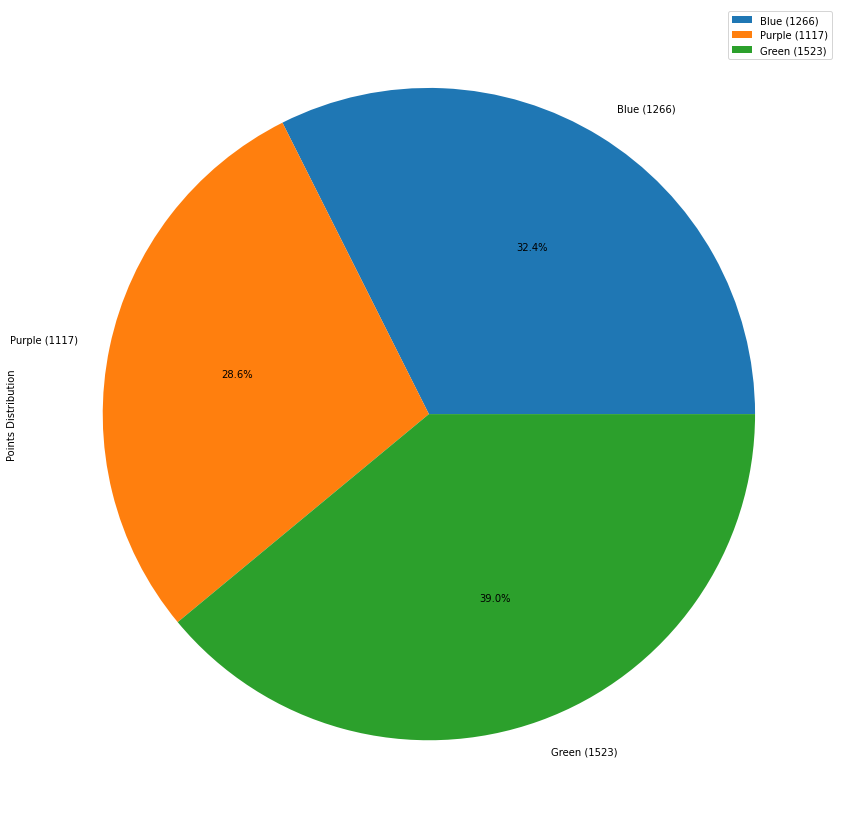

In [217]:
# Visualize points data
blue = dataFrame['blue_points'].astype(int).sum()
purple = dataFrame['purple_points'].astype(int).sum()
green= dataFrame['green_points'].astype(int).sum()

blue_label = 'Blue' + ' (' + str(blue) + ')'
purple_label = 'Purple' + ' (' + str(purple) + ')'
green_label = 'Green' + ' (' + str(green) + ')'


pointFrame = pd.DataFrame({'Points Distribution': [blue, purple, green]}, 
                          index=[blue_label, purple_label, green_label])
plot = pointFrame.plot.pie(y='Points Distribution', figsize=(15, 15), autopct='%1.1f%%')

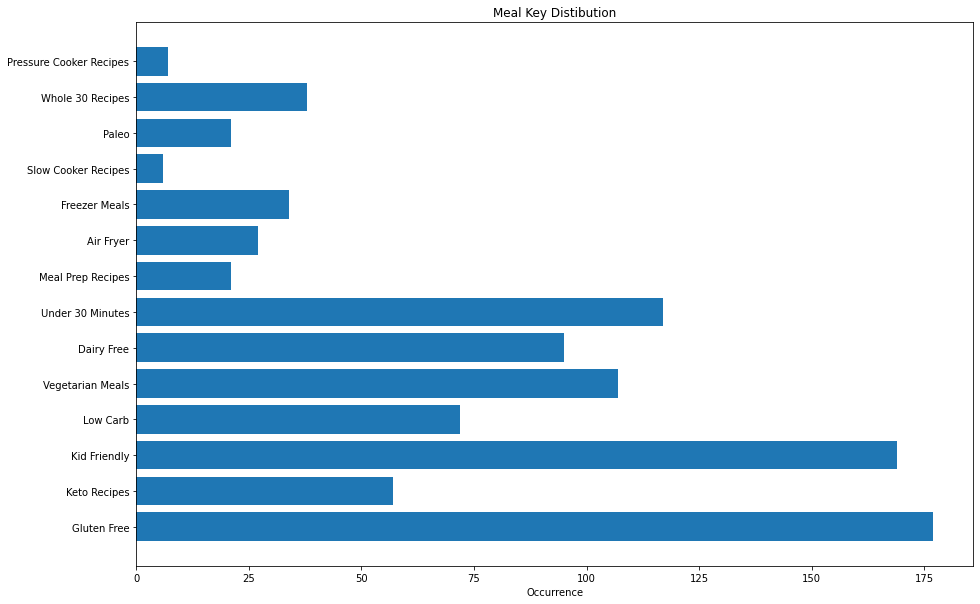

In [218]:
# Visualize keys data
keyFrame = pd.DataFrame(all_posts, columns=['keys'])
key_occurance = Counter()

for keys in keyFrame['keys']:
    key_occurance += Counter(keys)

keys = key_occurance.keys()
values = key_occurance.values()

plt.figure(figsize=(15,10))
y_pos = np.arange(len(keys))
plt.barh(y_pos, values, align='center')
plt.yticks(y_pos, keys)
plt.xlabel('Occurrence')
plt.title('Meal Key Distibution')
plt.show()


In [251]:
# Show results based on user input
accepted_results = []
max_calories = int(input('Max Calories '))
min_calories = int(input('Min Calories '))
max_blue = int(input('Max Blue Points '))
min_blue = int(input('Min Blue Points '))
max_green = int(input('Max Green Points '))
min_green = int(input('Min Green Points '))
max_purple = int(input('Max Purple Points '))
min_purple = int(input('Min Purple Points '))

dataFrame['calories'] = dataFrame['calories'].astype(float)
sortedFrame = dataFrame.sort_values(by=['calories'], ascending=True)

for index, item in sortedFrame.iterrows():
    
    calories = int(item['calories']);
    bp = int(item['blue_points']);
    gp = int(item['green_points'])
    pp = int(item['purple_points'])
    
    if calories <= max_calories and calories >= min_calories:
        if bp <= max_blue and bp >= min_blue:
             if gp <= max_green and gp >= min_green:
                    if pp <= max_purple and pp >= min_purple:
                        accepted_results.append(item)
                        if (len(accepted_results) >= 5):
                            break
print("")
print("RESULTS")
print("")
for item in accepted_results:
    print('Title: ' + item['title'])
    print('Summary: ' + item['summary'])
    display(Image(url=item['image']))
    print('Calories: ' + str(item['calories']))
    print('Blue points: ' + str(item['blue_points']))
    print('Purple points: ' + str(item['purple_points']))
    print('Green points: ' + str(item['green_points']))
    print("")
                        

Max Calories 500
Min Calories 200
Max Blue Points 7
Min Blue Points 3
Max Green Points 3
Min Green Points 1
Max Purple Points 8
Min Purple Points 2

RESULTS

Title: Roasted Honeynut Squash with Maple and Pecans
Summary: Roasted Roasted Honeynut Squash with Maple and Pecans is the perfect fall side dish! Sweeter and smaller than butternut and so much quicker to make. Roasted Honeynut Squash I’m...


Calories: 205.0
Blue points: 3
Purple points: 3
Green points: 3

Title: Crock Pot Picadillo
Summary: Crock Pot Picadillo is a flavorful Cuban dish made with ground beef and a sauce made from simmering tomatoes, green olives, bell peppers, cumin, and spices. Picadillo is a...


Calories: 207.0
Blue points: 3
Purple points: 3
Green points: 3

Title: Cauliflower Gnocchi
Summary: This delicious Cauliflower Gnocchi is made with cauliflower instead of traditional potatoes. No need for a Trader Joe’s run – make them from scratch with just three ingredients! Cauliflower...


Calories: 228.0
Blue points: 3
Purple points: 3
Green points: 3

Title: Swiss Chard Eggs Benedict
Summary: I love this lighter take on Eggs Benedict made with Canadian bacon, Swiss chard and poached eggs on a whole wheat English muffin. Perfect for breakfast or brunch! Swiss...


Calories: 244.0
Blue points: 4
Purple points: 3
Green points: 3



# 